In [2]:
import pandas as pd

# Get the unified BCG Strain spreadsheet
df = pd.read_csv("C:/Users/user/Downloads/user_data (1).csv", delimiter=',', encoding='ISO-8859-2') # [parameter] delimiter / encoding ?
pd.set_option('display.max_columns', None)
df.tail()

,user_id,stage,conversion
17170,user_17170,purchase,False
17171,user_17171,purchase,False
17172,user_17172,purchase,True
17173,user_17173,purchase,False
17174,user_17174,purchase,False


In [3]:
df.isnull().sum() # df.isnull() : 결측치 여부 확인
                  # .sum() : 결측치 개수 반환

user_id       0
stage         0
conversion    0
dtype: int64

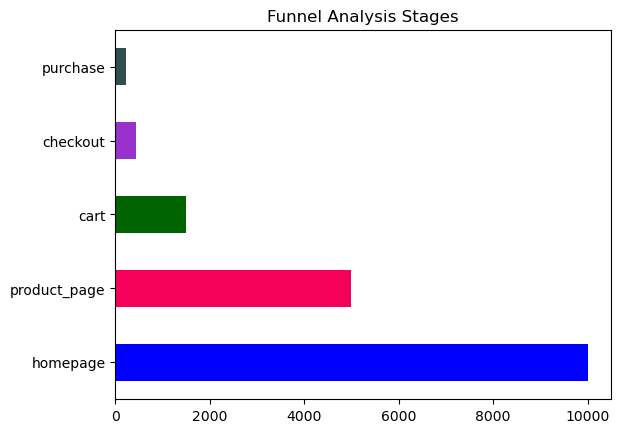

In [4]:
df['stage'].value_counts().plot.barh(color=['blue', '#f5005a', '#006400', '#9932CC', '#2F4F4F', '#1E90FF'], title = 'Funnel Analysis Stages');

In [5]:
df['conversion'].value_counts()

True     13014
False     4161
Name: conversion, dtype: int64

In [ ]:
# How many users are getting through each stage in the funnel.
dfgr = df.groupby('stage').count()['conversion'].reset_index().sort_values(by='conversion', ascending=False)
# df.groupby('stage').count()['conversion'] : 'stage'열을 기준으로 데이터 그룹화 / 각 그룹에 대해 'conversion'열의 개수 계산
# .reset_index() : 결과를 새로운 DataFrame으로 변환하고, 인덱스 리셋
# .sort_values(by='conversion', ascending=False) : 'conversion'열을 기준으로 내림차수 정렬
dfgr.style.background_gradient(cmap='PuOr')
# 결과 DataFrame에 스타일 적용
# background_gradient() 메소드를 사용하여 셀 배경에 그라데이션 적용
# 'PuOr' 컬러맵을 사용하여 보라색과 주황색 계열의 그라데이션 생성

,stage,conversion
2,homepage,10000
3,product_page,5000
0,cart,1500
1,checkout,450
4,purchase,225


In [ ]:
# Respective numbers are above
import plotly.express as px
data = dict( # 가독성 위해서 줄 바꿈
    number=[10000, 5000, 1500, 450, 225],
    stage=["homepage", "product_page", "purchase", "checkout", "cart"]) # key : value 형태로 데이터를 저장하고 싶으니까 dict 사용 
fig = px.funnel(data, x='number', y='stage') # figure의 약자인 것 같음. plotly.express에 funnel 시각화 function 내재
fig.show()

In [22]:
# Basic Funnel Chart with graph_objects trace go.Funnel
from plotly import graph_objects as go

fig = go.Figure(go.Funnel(
    y = ['homepage', 'product_page', 'purchase', 'checkout', 'cart'],
    x = [10000, 5000, 1500, 450, 225],
    textposition = 'inside', # text를 도형 안에다 넣고
    textinfo = 'value + percent initial', # text는 value값과 percent까지
    opacity = 0.65, marker = {'color': ['deepskyblue', 'lightsalmon', 'tan', 'teal', 'silver'], # opacity는 불투명도 # marker : funnel 각 단계의 배경색
    'line' : {'width': [4, 2, 2, 3, 1, 1], 'color' : ['wheat', 'wheat', 'blue', 'wheat', 'wheat']}}, # line에 걸려있는 거임 line의 width랑 color 설정
    connector = {'line' : {'color' : 'royalblue', 'dash' : 'dot', 'width' : 3}} # connector : 각 단계 연결하는 점선
))

fig.show()

In [23]:
# Basic Area Funnel Plot with plotly.express
import plotly.express as px
fig = px.funnel_area(names=['homepage', 'product_page', 'purchase', 'checkout', 'cart'],
                     values=[10000, 5000, 1500, 450, 225])
fig.show()

In [1]:
# Basic Area Funnel Plot with go.Funnelarea
from plotly import graph_objects as go

fig = go.Figure(go.Funnelarea(
    text = ['homepage', 'product_page', 'purchase', 'checkout', 'cart'],
    values = [10000, 5000, 1500, 450, 225]
))
fig.show()

In [2]:
# Set Marker Size and Color in Area Funnel Plots
from plotly import graph_objects as go

fig = go.Figure(go.Funnelarea(
    values = [10000, 5000, 1500, 450, 225], text = ['homepage', 'product_page', 'purchase', 'checkout', 'cart'],
    marker = {'colors' : ['deepskyblue', 'lightsalmon', 'tan', 'teal', 'silver'],
              'line' : {'color' : ['wheat', 'wheat', 'blue', 'wheat', 'wheat'], 'width' : [0, 1, 5, 0, 4]}},
    textfont = {'family' : 'Old Standart TT, serif', 'size' : 13, 'color' : 'black'}, opacity = 0.65
))
fig.show()